## Zomato Restaurant


Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name




In [118]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,GridSearchCV,train_test_split

from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [57]:
Zomato_Ds=pd.read_csv("zomato.csv",encoding='latin-1')

In [58]:
Zomato_Ds

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [59]:
Zomato_Ds.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [60]:
Zomato_Ds.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730              NamlÛ± Gurme           208  ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208  ÛÁstanbul   
9548        5915807                     Huqqa           208  ÛÁstanbul   
9549        5916112              Aôôk Kahve           208  ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208  ÛÁstanbul   

                                                Address     Locality  \
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...     Karakí_y   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...    Koôuyolu   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karakí_y, ÛÁstanbul  28.977392  41.022793   
9547    Koôuyolu, ÛÁstanbul  29.041297  41.009847   
9548  Kuruí_eôme, ÛÁstanbul  29.034640  41.055817   
9549  Kuruí_eôme, ÛÁstanbul  29.036019  41.057979   
9550         Moda, ÛÁstanbul  29.026016  40.984776   

                             Cuisines  ...          Currency  \
9546                          Turkish  ...  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548           Italian, World Cuisine  ...  Turkish Lira(TL)   
9549                  Restaurant Cafe  ...  Turkish Lira(TL)   
9550                             Cafe  ...  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu Price range  Aggregate rating  Rating color  \
9546                   No           3               4.1         Green   
9547                   No           3               4.2         Green   
9548                   No           4               3.7        Yellow   
9549                   No           4               4.0         Green   
9550                   No           2               4.0         Green   

     Rating text Votes  
9546   Very Good   788  
9547   Very Good  1034  
9548        Good   661  
9549   Very Good   901  
9550   Very Good   591  

[5 rows x 21 columns]

In [61]:
Zomato_Ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are 8 numerical data and 12 categorical data

In [62]:
Zomato_Ds.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [63]:
Zomato_Ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are no null values in this dataset

In [64]:
Zomato_Ds.duplicated().sum()

0

There are no duplicate values in the dataset

In [65]:
Zomato_Ds.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [66]:
Zomato_Ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [67]:
for i in Zomato_Ds.columns:
    print(Zomato_Ds[i].value_counts())
    print('\n')

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64


Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64


Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula      

The column "Switch to order Menu" has no option only and it will not impact the target. Restaurant id,Address doesn not impact the target. Hence dropping the columns.

In [68]:
Zomato_Ds = Zomato_Ds.drop(['Switch to order menu', 'Restaurant ID', 'Address'], axis=1)

In [69]:
Zomato_Ds.head()

Restaurant Name  Country Code              City  \
0        Le Petit Souffle           162       Makati City   
1        Izakaya Kikufuji           162       Makati City   
2  Heat - Edsa Shangri-La           162  Mandaluyong City   
3                    Ooma           162  Mandaluyong City   
4             Sambo Kojin           162  Mandaluyong City   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591  
2               4.4        Green   Very Good    270  
3               4.9   Dark Green   Excellent    365  
4               4.8   Dark Green   Excellent    229

In [70]:
Zomato_Ds.isin(['?']).sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [71]:
Zomato_Ds.describe()

Country Code    Longitude     Latitude  Average Cost for two  \
count   9551.000000  9551.000000  9551.000000           9551.000000   
mean      18.365616    64.126574    25.854381           1199.210763   
std       56.750546    41.467058    11.007935          16121.183073   
min        1.000000  -157.948486   -41.330428              0.000000   
25%        1.000000    77.081343    28.478713            250.000000   
50%        1.000000    77.191964    28.570469            400.000000   
75%        1.000000    77.282006    28.642758            700.000000   
max      216.000000   174.832089    55.976980         800000.000000   

       Price range  Aggregate rating         Votes  
count  9551.000000       9551.000000   9551.000000  
mean      1.804837          2.666370    156.909748  
std       0.905609          1.516378    430.169145  
min       1.000000          0.000000      0.000000  
25%       1.000000          2.500000      5.000000  
50%       2.000000          3.200000     31.000000  
75%       2.000000          3.700000    131.000000  
max       4.000000          4.900000  10934.000000

In [72]:
for i in Zomato_Ds.columns:
    if Zomato_Ds[i].dtypes == 'object':
        print(Zomato_Ds[i].value_counts())

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                    

In [73]:
Cuisines_droppped = (Zomato_Ds.query('Cuisines.isna()', engine='python'))
Cuisines_droppped

Restaurant Name  Country Code            City  \
84                    Cookie Shoppe           216          Albany   
87   Pearly's Famous Country Cookng           216          Albany   
94                Jimmie's Hot Dogs           216          Albany   
297                  Corkscrew Cafe           216     Gainesville   
328                        Dovetail           216           Macon   
346            HI Lite Bar & Lounge           216          Miller   
368                       Hillstone           216         Orlando   
418                Leonard's Bakery           216  Rest of Hawaii   
455        Tybee Island Social Club           216        Savannah   

         Locality         Locality Verbose   Longitude   Latitude Cuisines  \
84         Albany           Albany, Albany  -84.154000  31.577200      NaN   
87         Albany           Albany, Albany  -84.175900  31.588200      NaN   
94         Albany           Albany, Albany  -84.153400  31.575100      NaN   
297     Dahlonega   Dahlonega, Gainesville  -83.985800  34.531800      NaN   
328         Macon             Macon, Macon  -83.627979  32.836410      NaN   
346        Miller           Miller, Miller  -98.989100  44.515800      NaN   
368   Winter Park     Winter Park, Orlando  -81.365260  28.596682      NaN   
418       Kaimuki  Kaimuki, Rest of Hawaii -157.813432  21.284586      NaN   
455  Tybee Island   Tybee Island, Savannah  -80.848297  31.995810      NaN   

     Average Cost for two   Currency Has Table booking Has Online delivery  \
84                      0  Dollar($)                No                  No   
87                      0  Dollar($)                No                  No   
94                     10  Dollar($)                No                  No   
297                    40  Dollar($)                No                  No   
328                    40  Dollar($)                No                  No   
346                     0  Dollar($)                No                  No   
368                    40  Dollar($)                No                  No   
418                    10  Dollar($)                No                  No   
455                    10  Dollar($)                No                  No   

    Is delivering now  Price range  Aggregate rating Rating color Rating text  \
84                 No            1               3.4       Orange     Average   
87                 No            1               3.4       Orange     Average   
94                 No            1               3.9       Yellow        Good   
297                No            3               3.9       Yellow        Good   
328                No            3               3.8       Yellow        Good   
346                No            1               3.4       Orange     Average   
368                No            3               4.4        Green   Very Good   
418                No            1               4.7   Dark Green   Excellent   
455                No            1               3.9       Yellow        Good   

     Votes  
84      34  
87      36  
94     160  
297    209  
328    102  
346     11  
368   1158  
418    707  
455    309

In [74]:
city_data = Zomato_Ds[Zomato_Ds['City'] == 'Albany']

In [75]:
city_data['Cuisines'].value_counts()

Cuisines
Japanese, Steak, Sushi          2
BBQ, Burger, Seafood            1
American, BBQ                   1
Mexican                         1
Coffee and Tea, Sandwich        1
Fast Food                       1
Asian, Chinese, Vegetarian      1
Pizza, Bar Food, Sandwich       1
Steak, Tapas, Bar Food          1
Chinese, Seafood, Vegetarian    1
Chinese                         1
American, Burger, Sandwich      1
American, Steak                 1
Seafood, Tapas, Bar Food        1
Italian, Pizza                  1
American, Breakfast, Diner      1
Name: count, dtype: int64

In [76]:
Zomato_Ds['Cuisines'] = Zomato_Ds['Cuisines'].fillna(Zomato_Ds['Cuisines'].mode()[0])

In [77]:
Zomato_Ds['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [78]:
Zomato_Ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9551 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

EDA Analysis

Text(0.5, 1.0, 'Count Of Price Range')

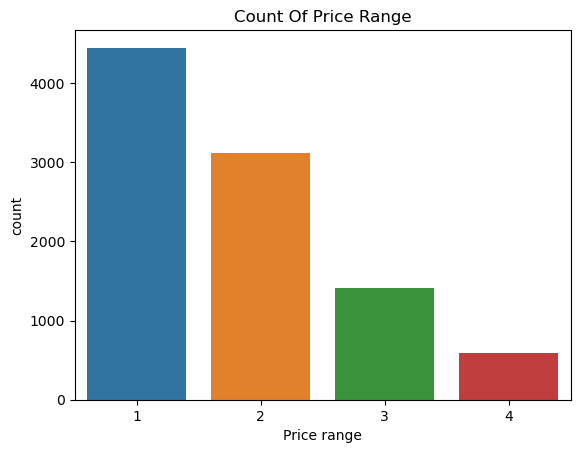

In [79]:
sns.countplot(x='Price range', data=Zomato_Ds);
plt.title("Count Of Price Range")

Text(0.5, 1.0, 'Count Of Online Delivery')

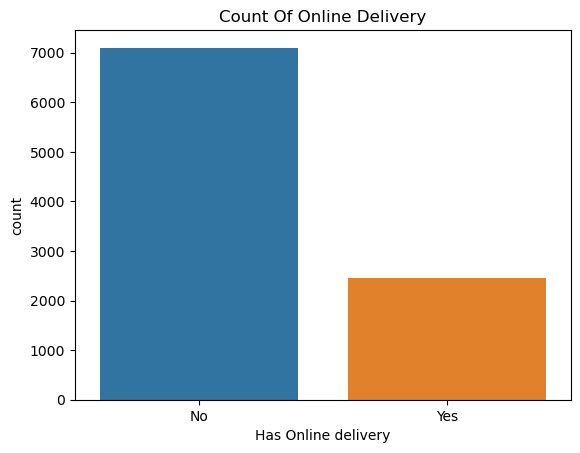

In [80]:
sns.countplot(x='Has Online delivery', data=Zomato_Ds);
plt.title("Count Of Online Delivery")

Text(0.5, 1.0, 'Count Of Table Booking')

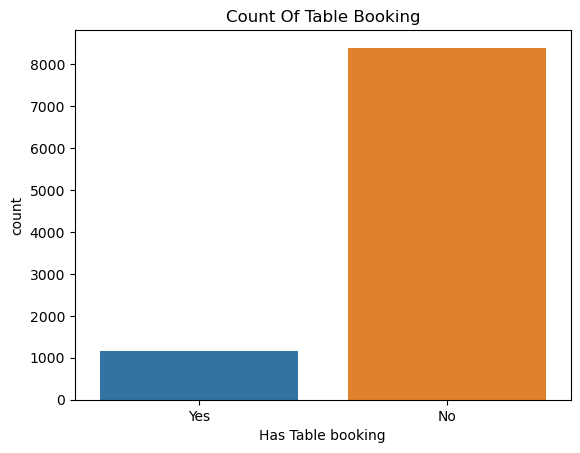

In [81]:
sns.countplot(x='Has Table booking', data=Zomato_Ds)
plt.title("Count Of Table Booking")

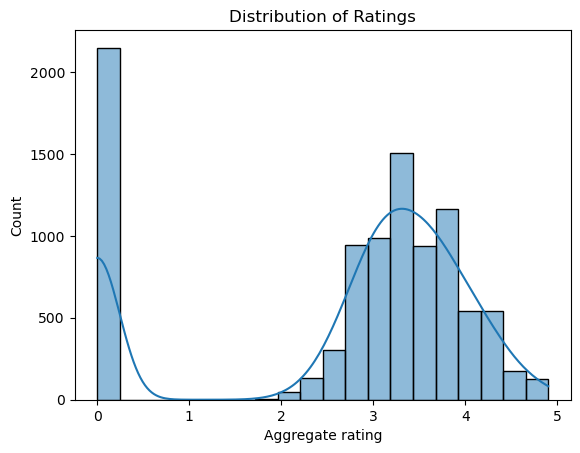

In [82]:
sns.histplot(Zomato_Ds['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()



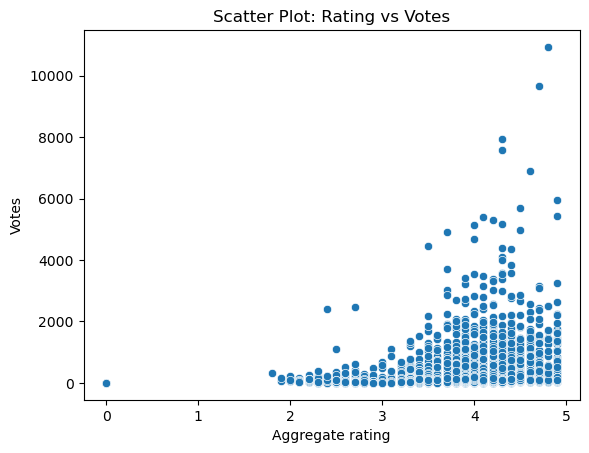

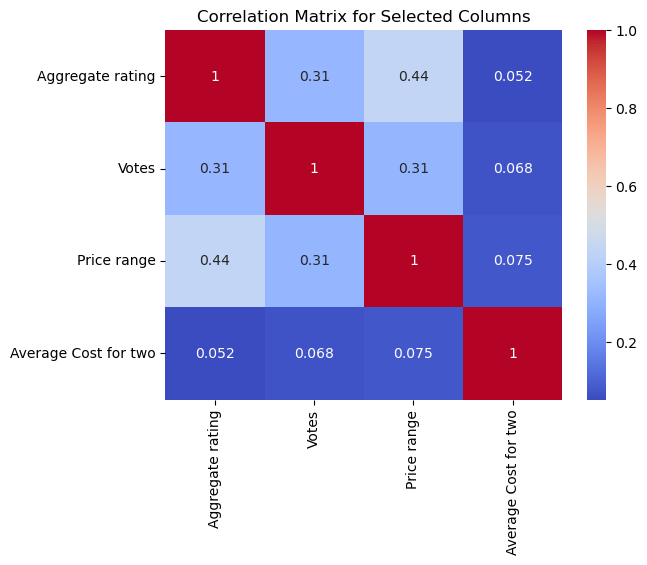

In [83]:
# Scatter plot between Rating and Votes
sns.scatterplot(x='Aggregate rating', y='Votes', data=Zomato_Ds)
plt.title('Scatter Plot: Rating vs Votes')
plt.show()

# Specify the columns you want to include in correlation analysis
selected_columns = ['Aggregate rating', 'Votes', 'Price range', 'Average Cost for two']

# Select only the specified columns
selected_data = Zomato_Ds[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()

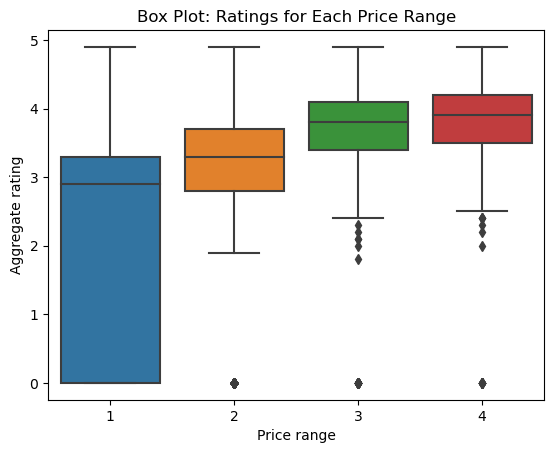

In [84]:
sns.boxplot(x='Price range', y='Aggregate rating', data=Zomato_Ds)
plt.title('Box Plot: Ratings for Each Price Range')
plt.show()

Converting Categorical data into Numerical Data

In [85]:
categorical_col=[]
for i in Zomato_Ds.dtypes.index:
    if Zomato_Ds.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text']


In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Le=LabelEncoder()
Zomato_Ds[categorical_col]=Zomato_Ds[categorical_col].apply(Le.fit_transform)

In [87]:
Zomato_Ds.head()

Restaurant Name  Country Code  City  Locality  Locality Verbose  \
0             3749           162    73       171               172   
1             3173           162    73       593               601   
2             2897           162    75       308               314   
3             4707           162    75       862               875   
4             5523           162    75       862               875   

    Longitude   Latitude  Cuisines  Average Cost for two  Currency  \
0  121.027535  14.565443       920                  1100         0   
1  121.014101  14.553708      1111                  1200         0   
2  121.056831  14.581404      1671                  4000         0   
3  121.056475  14.585318      1126                  1500         0   
4  121.057508  14.584450      1122                  1500         0   

   Has Table booking  Has Online delivery  Is delivering now  Price range  \
0                  1                    0                  0            3   
1                  1                    0                  0            3   
2                  1                    0                  0            4   
3                  0                    0                  0            4   
4                  1                    0                  0            4   

   Aggregate rating  Rating color  Rating text  Votes  
0               4.8             0            1    314  
1               4.5             0            1    591  
2               4.4             1            5    270  
3               4.9             0            1    365  
4               4.8             0            1    229

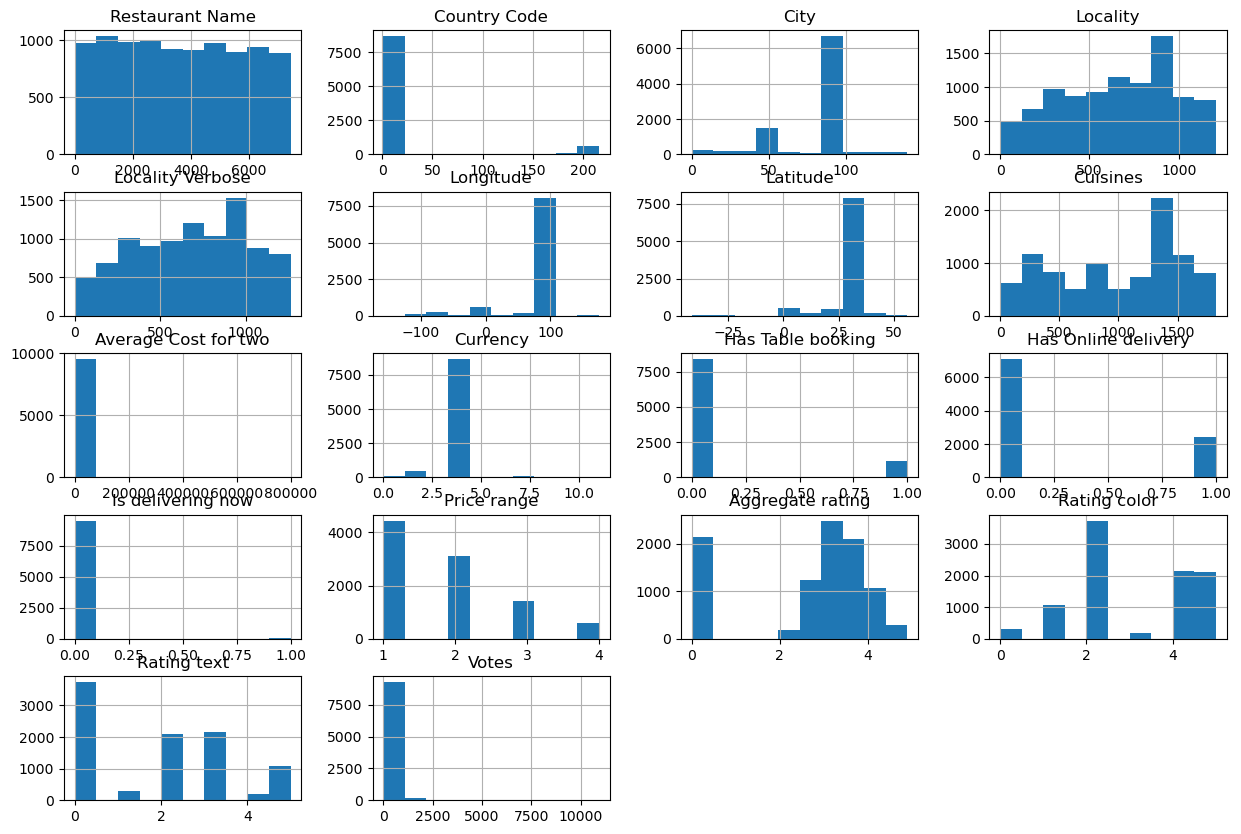

In [89]:
Zomato_Ds.hist(bins=10,figsize=(15,10));

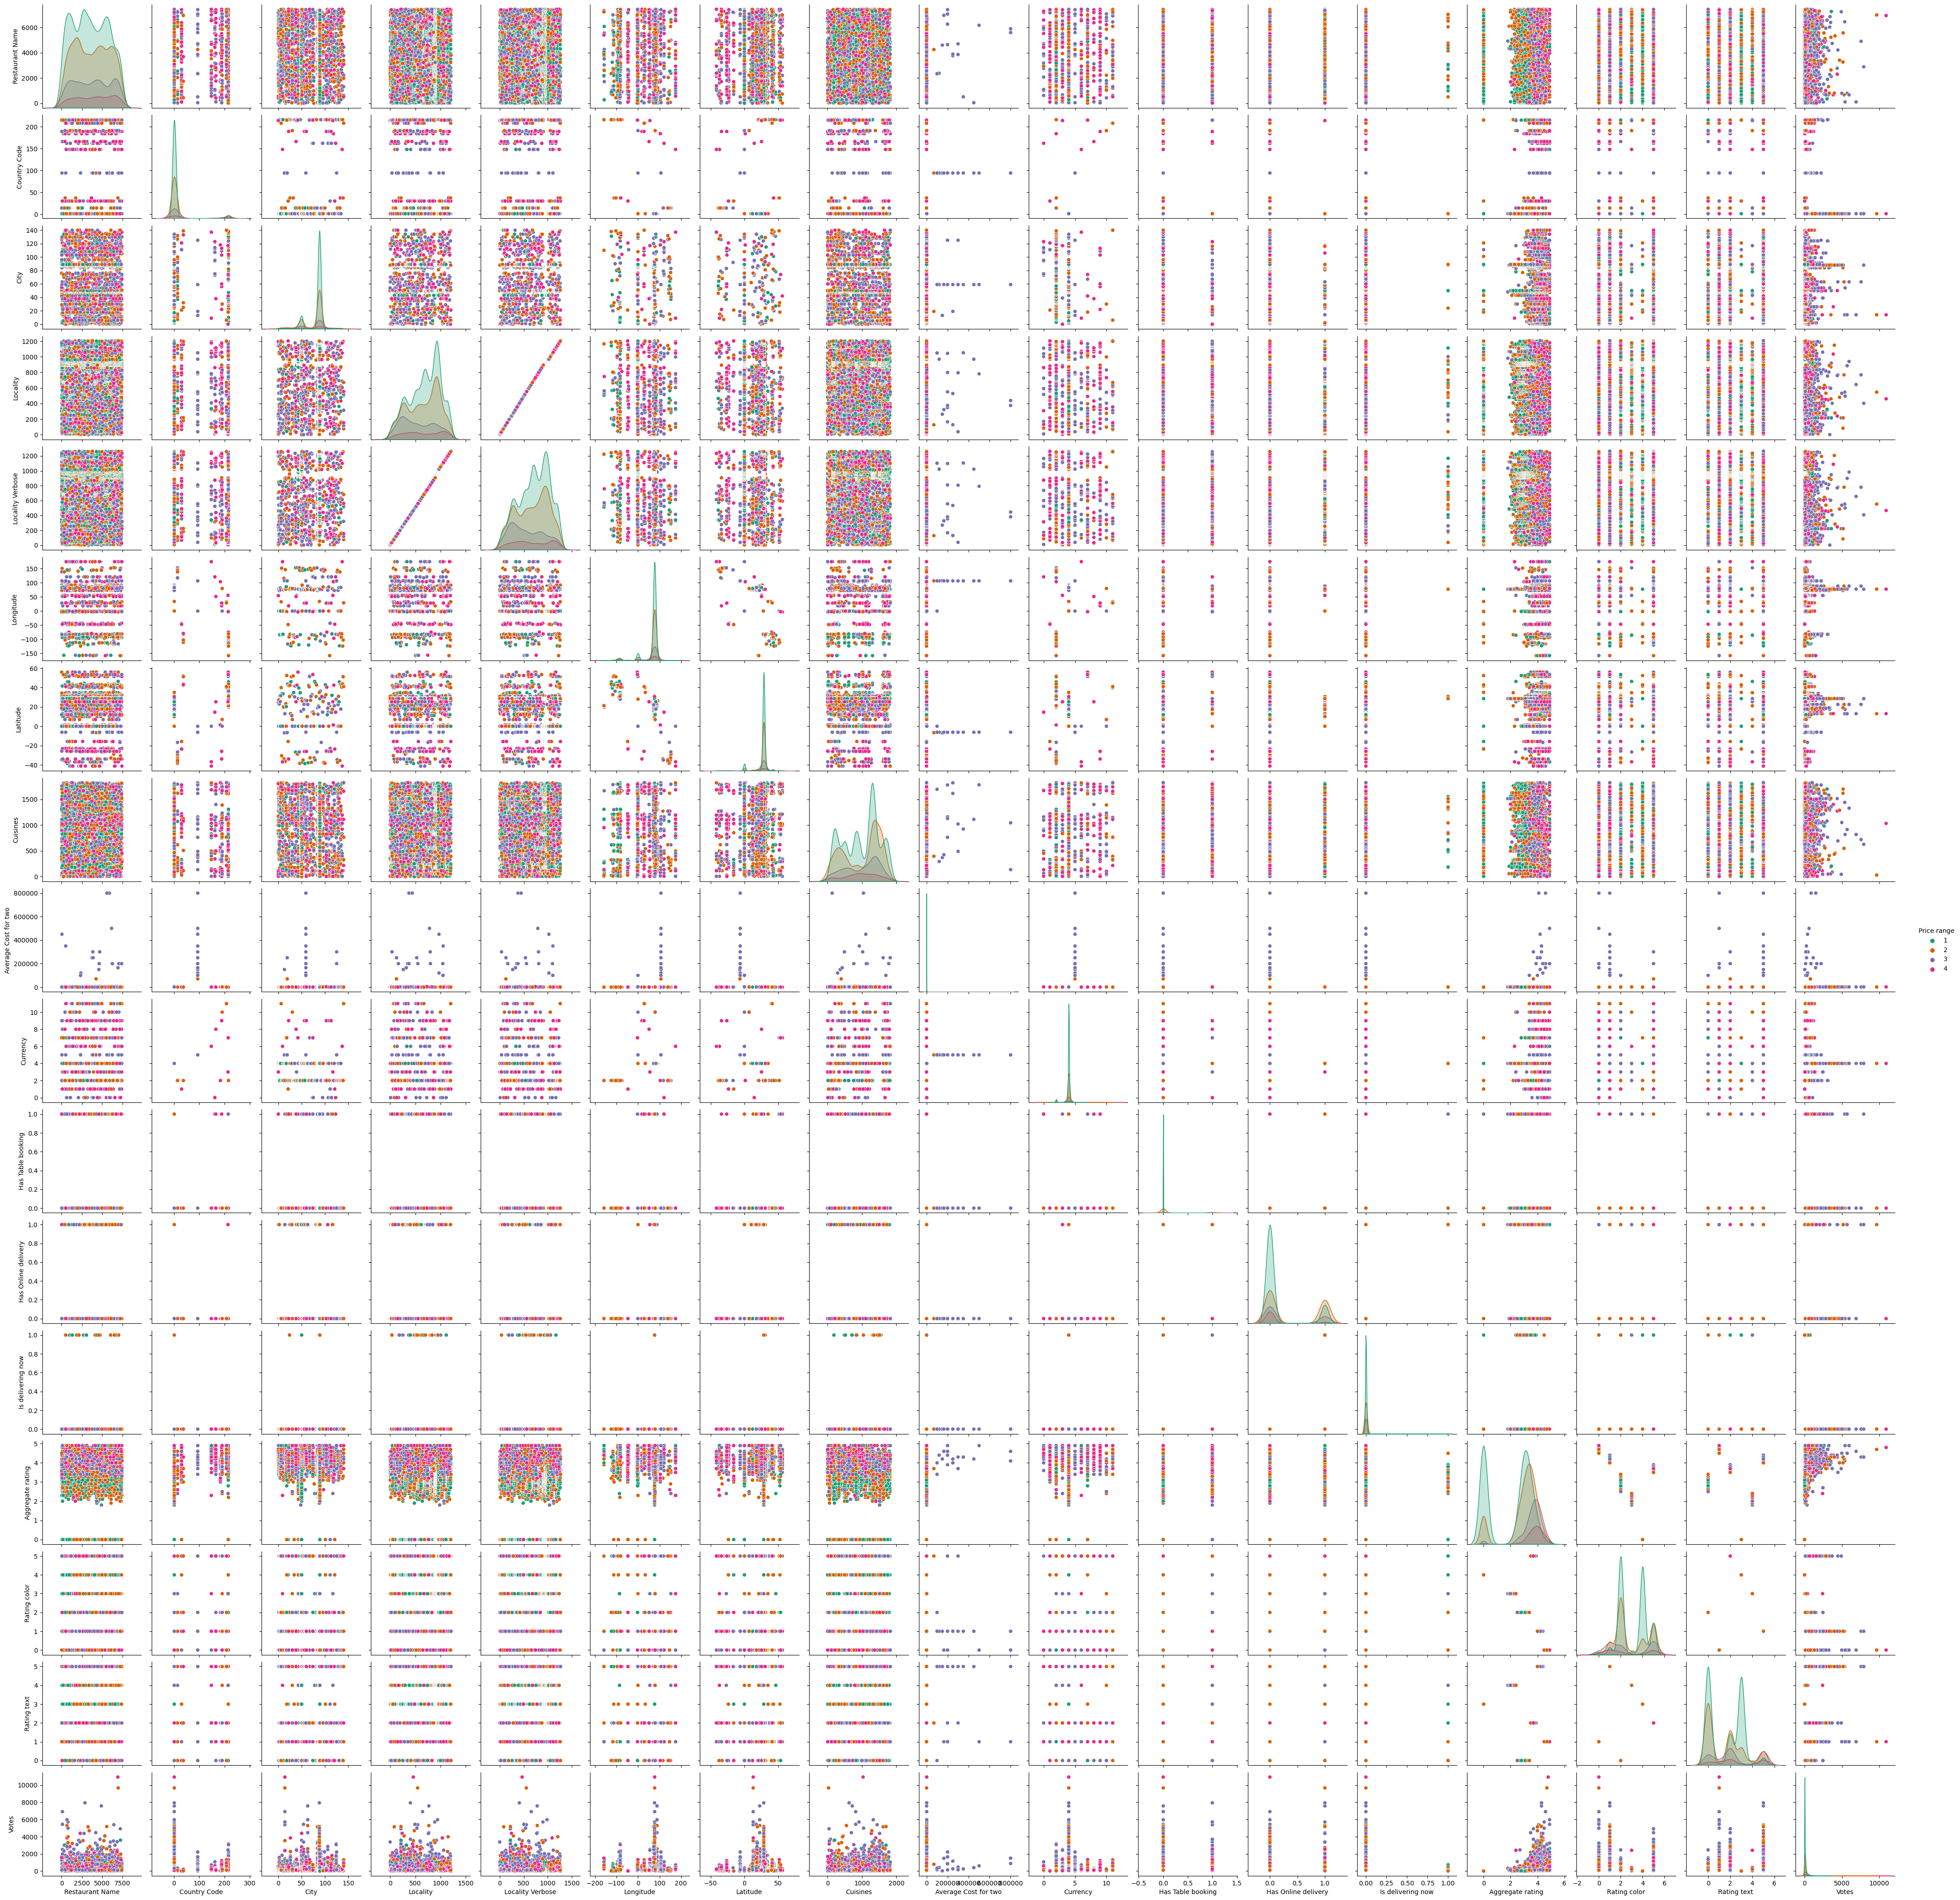

In [95]:
sns.pairplot(Zomato_Ds, palette="Dark2", hue='Price range');

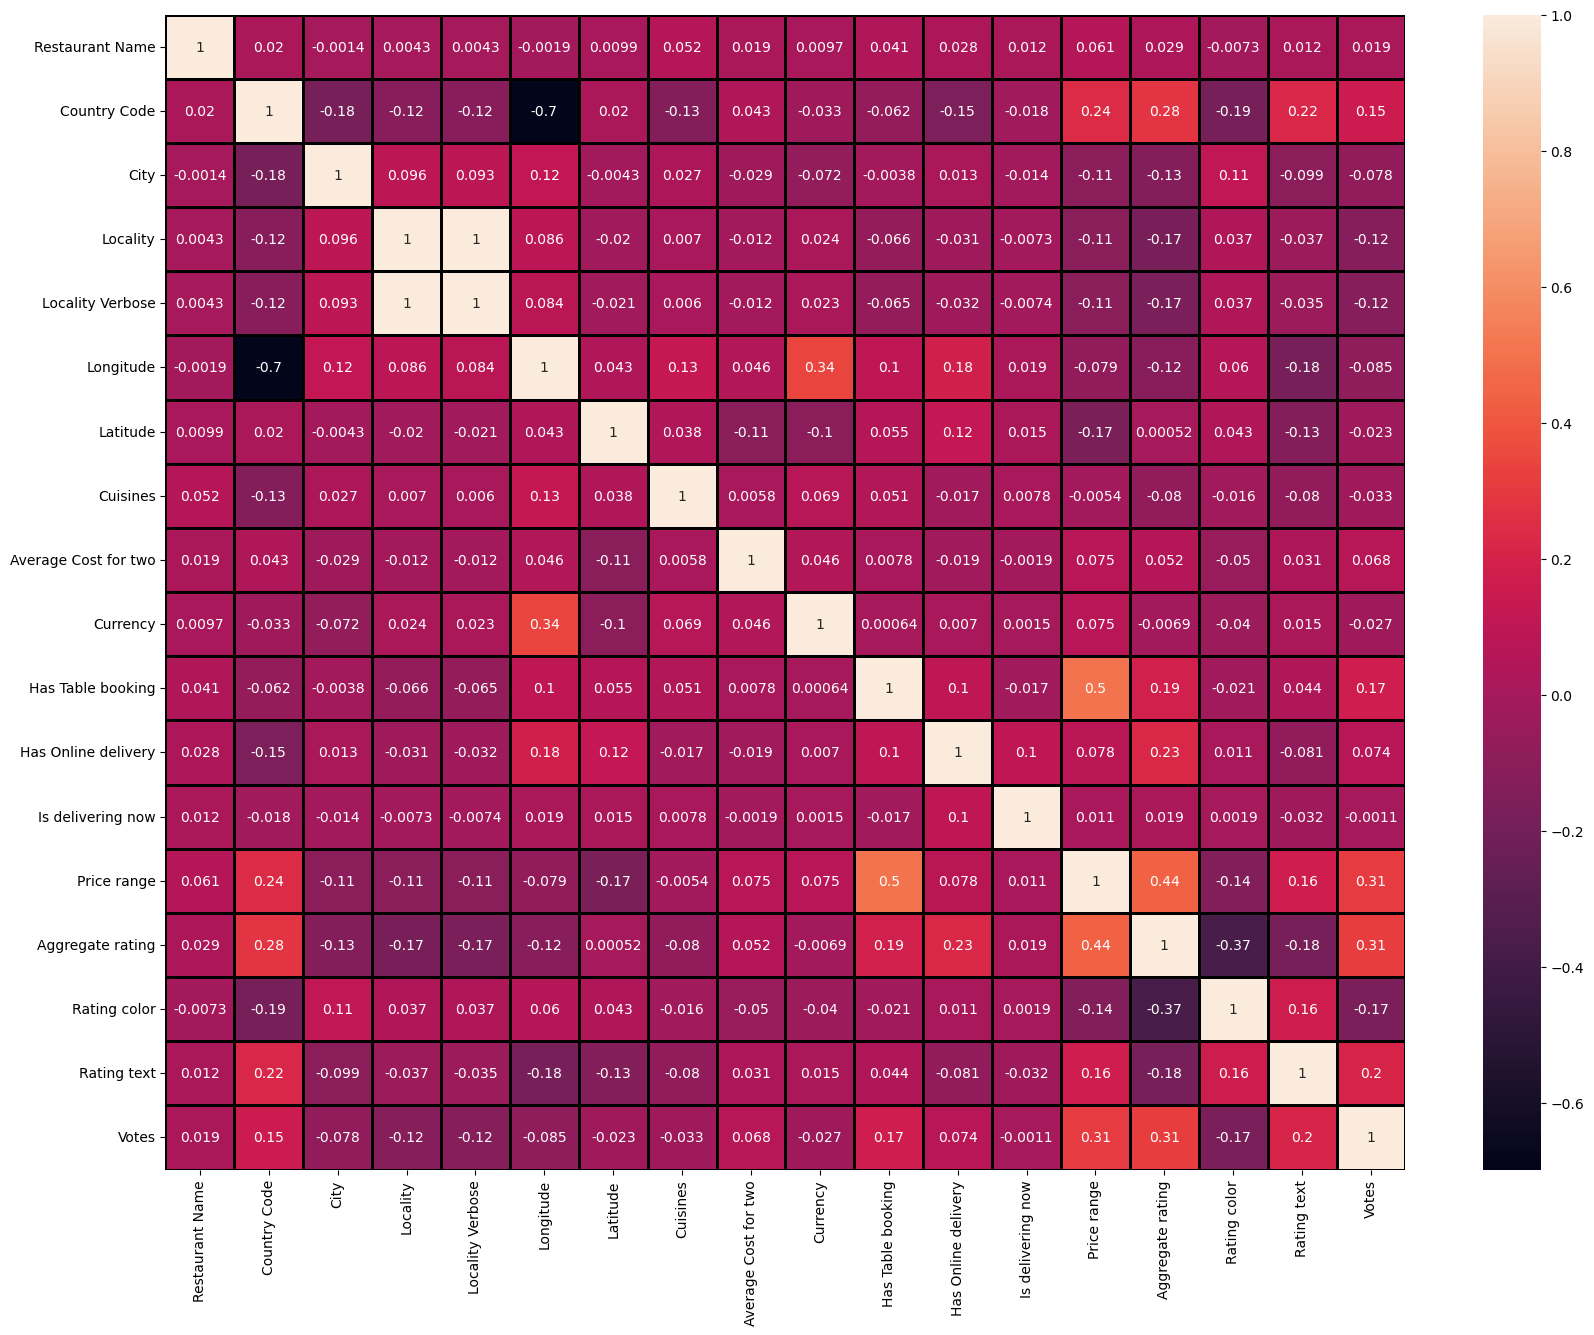

In [97]:
plt.figure(figsize=(20,15))
sns.heatmap(Zomato_Ds.corr(numeric_only=True), annot=True, linewidths=1, linecolor='black');

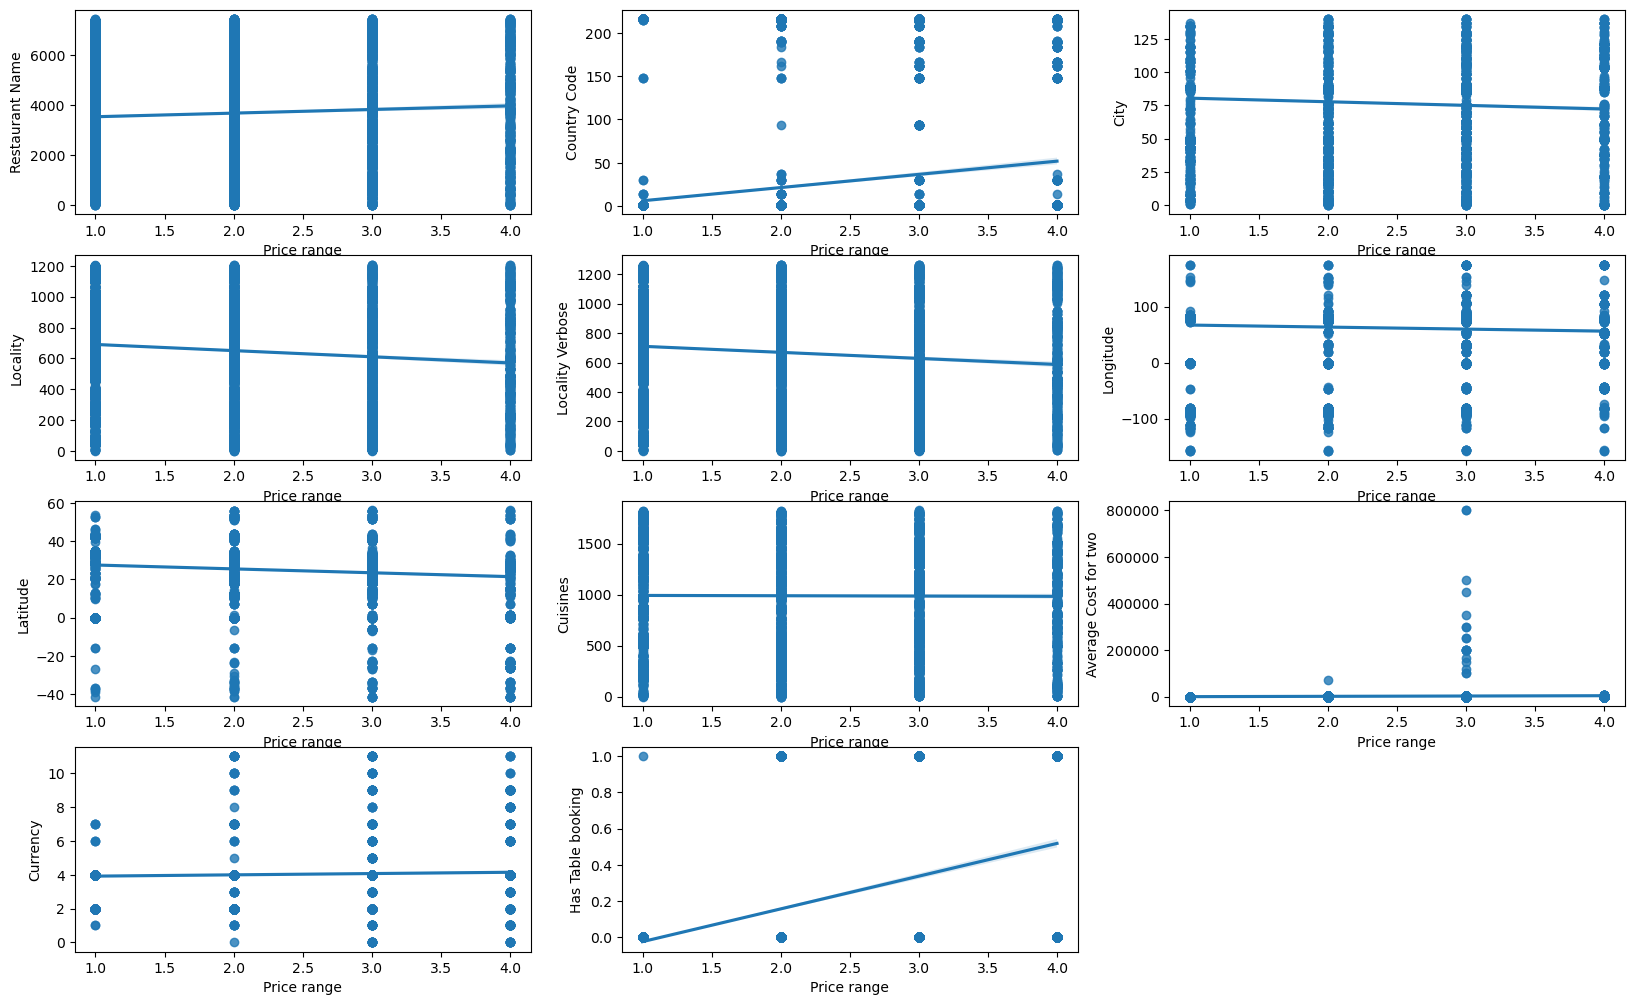

In [99]:
plt.figure(figsize=(20,25))
p=1
for i in Zomato_Ds:
    if p<=11:
        plt.subplot(8,3,p)
        sns.regplot(x='Price range', y=i, data=Zomato_Ds)
        plt.xlabel('Price range')
        plt.ylabel(i)
    p+=1
plt.show()

IndexError: index 17 is out of bounds for axis 0 with size 17

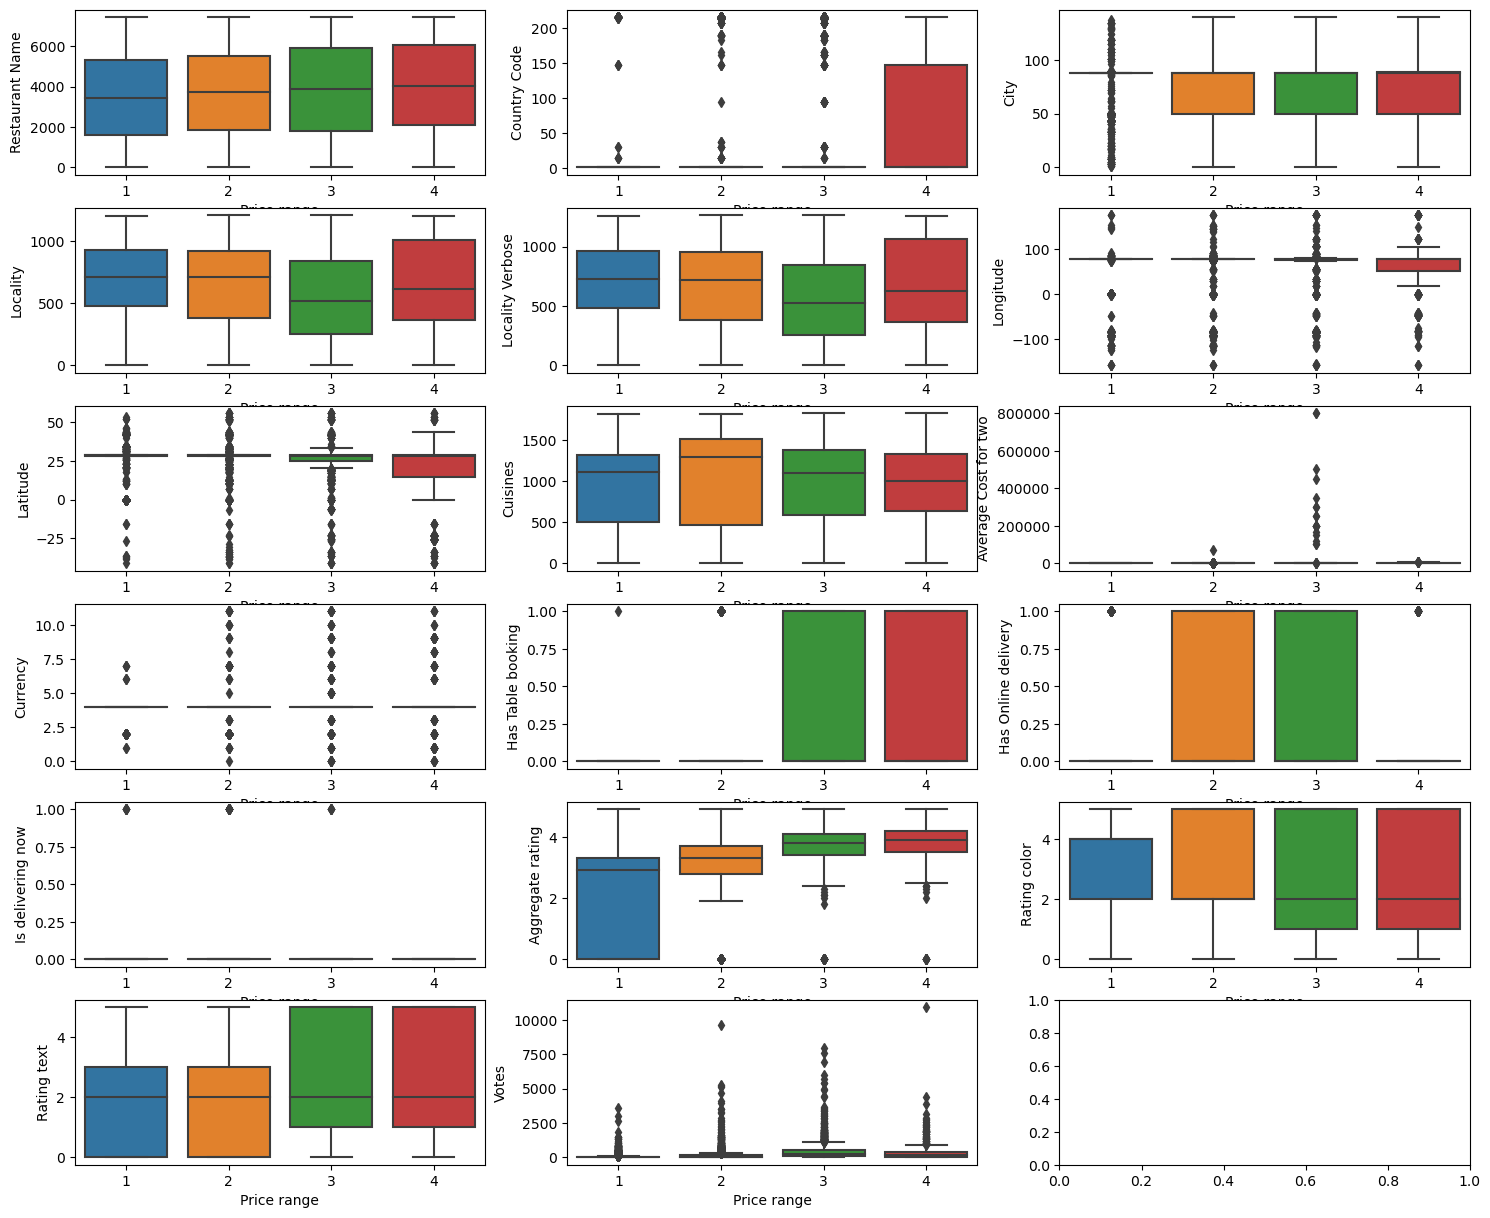

In [103]:
fig, axs = plt.subplots(6, 3, figsize=(18,15))
features = Zomato_Ds.drop('Price range', axis=1).columns
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(x='Price range', y=features[i], data=Zomato_Ds, ax=ax)
plt.tight_layout()
plt.show()

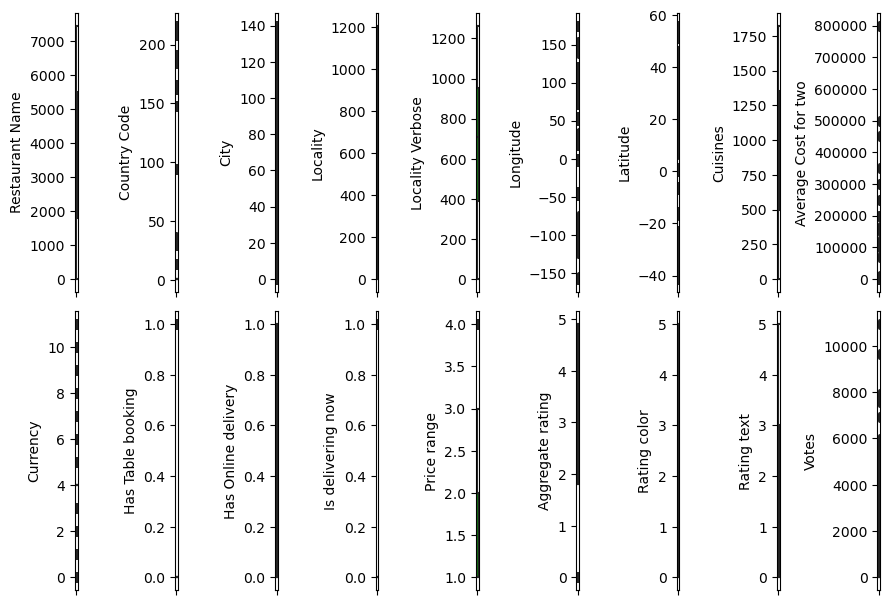

In [105]:
collist=Zomato_Ds.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=Zomato_Ds[collist[i]], color='green', orient='x')
    plt.tight_layout()

Checking skewness

In [106]:
Zomato_Ds_skew = Zomato_Ds.skew()
Zomato_Ds_skew

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [107]:
for index, value in Zomato_Ds_skew.items():
    if value > 0.5 or value < -0.5:
        Zomato_Ds[index] = np.cbrt(Zomato_Ds[index])
Zomato_Ds.skew()

Restaurant Name          0.044637
Country Code             2.923867
City                    -2.790853
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.928779
Latitude                -3.856661
Cuisines                -0.307425
Average Cost for two     9.626632
Currency                -3.580645
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.495755
Aggregate rating        -1.272627
Rating color             0.046009
Rating text              0.431408
Votes                    1.204920
dtype: float64

In [108]:
x = Zomato_Ds.drop(['Price range'], axis=1)
y = Zomato_Ds[['Price range']]

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values              Features
0      3.911308       Restaurant Name
1      4.883890          Country Code
2     41.261256                  City
3   5087.456915              Locality
4   4917.333651      Locality Verbose
5      9.416720             Longitude
6      8.204361              Latitude
7      4.849612              Cuisines
8      8.018507  Average Cost for two
9     69.409443              Currency
10     1.394819     Has Table booking
11     1.598888   Has Online delivery
12     1.016060     Is delivering now
13    11.699271      Aggregate rating
14     5.890477          Rating color
15     3.419213           Rating text
16     7.004046                 Votes

In [111]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [112]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values              Features
0     1.007596       Restaurant Name
1     2.415500          Country Code
2     1.126192                  City
3   953.893822              Locality
4   952.502150      Locality Verbose
5     2.613018             Longitude
6     1.192764              Latitude
7     1.041371              Cuisines
8     1.418877  Average Cost for two
9     1.288057              Currency
10    1.226893     Has Table booking
11    1.189509   Has Online delivery
12    1.012492     Is delivering now
13    2.776873      Aggregate rating
14    1.225018          Rating color
15    1.657756           Rating text
16    2.587403                 Votes

In [113]:
x = x.drop(['Locality Verbose'], axis=1)

Data Splitting for Price Range

In [114]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 43)

Model Prediction-Price Range

In [119]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),BaggingRegressor(),RandomForestRegressor(),
       GradientBoostingRegressor(),Ridge(),Lasso()]
max_r2_score=0
for i_state in range(10,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_score1=r2_score(y_test,pred)
        #print('r2_score for random_state',i_state,'is',r2_score1)
        if r2_score1>max_r2_score:
            max_r2_score=r2_score1
            Final_state=i_state
            Final_model=i
print('R2_score is ',max_r2_score,'for random state ',Final_state, 'and model is ',Final_model)

R2_score is  0.9900807419894643 for random state  11 and model is  RandomForestRegressor()


In [120]:
rfc=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_y=rfc.predict(x_test)
rfc=r2_score(y_test,pred_y)
print('r2_score =',rfc*100)

r2_score = 99.04684714748574


RandomForestRegressor R2 score is 99.04 and it has best R2 score when compared to all models

HYPERPARAMETER TUNING
RandomizedSearchCV

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
random_grid = {'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]}
rfc = RandomForestRegressor()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=11, n_jobs = -1)

rfc_random.fit(x_train, y_train)
best_params = rfc_random.best_params_
best_rfc = RandomForestRegressor(**best_params)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [122]:
best_rfc.fit(x,y)
pred_y1=best_rfc.predict(x_test)
rfc1=r2_score(y_test,pred_y1)
print('Evalating best R2_score for Random Forest Regressor ',rfc1*100)

Evalating best R2_score for Random Forest Regressor  99.88220434313588


In [123]:
print('mean_absolute_error is',mean_absolute_error(y_test,pred_y1))
print('mean_squared_error',mean_squared_error(y_test,pred_y1))
print('root mean absolute error',np.sqrt(mean_absolute_error(y_test,pred_y1)))

mean_absolute_error is 0.001562823779978902
mean_squared_error 4.3439193754283385e-05
root mean absolute error 0.03953256606873505


In [124]:
pred_y1

array([1.25992105, 1.44370109, 1.557645  , ..., 1.25992105, 1.        ,
       1.        ])

Text(0, 0.5, 'pred_y1')

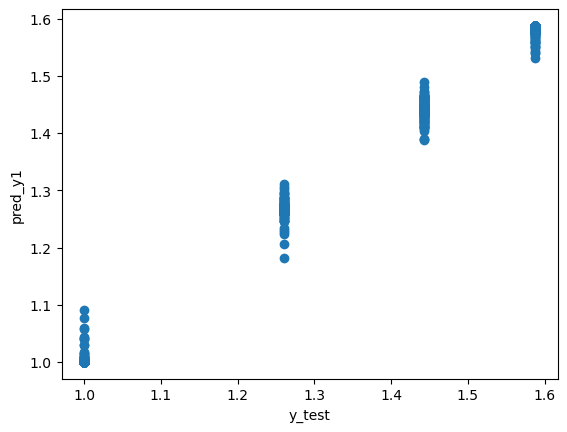

In [125]:
plt.scatter(x=y_test,y=pred_y1)
plt.xlabel('y_test')
plt.ylabel('pred_y1')

Saving Model

In [127]:
import pickle
filename = 'Zomato Restaurant_PriceRange_best_model.pkl'
pickle.dump(best_rfc, open(filename, 'wb'))

#### Model Prediction:Average cost for two

In [157]:
x1 = Zomato_Ds.drop(['Average Cost for two'], axis=1)
y1 = Zomato_Ds[['Average Cost for two']]

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
                        for i in range(len(x1.columns))]
vif["Features"] = x1.columns

vif

VIF values             Features
0      3.923094      Restaurant Name
1      5.121163         Country Code
2     42.735411                 City
3   5087.299442             Locality
4   4917.278116     Locality Verbose
5      9.064638            Longitude
6      7.955279             Latitude
7      4.875237             Cuisines
8     86.122624             Currency
9      1.564866    Has Table booking
10     1.598614  Has Online delivery
11     1.016581    Is delivering now
12    60.877990          Price range
13    12.178748     Aggregate rating
14     5.922070         Rating color
15     3.496892          Rating text
16     7.039293                Votes

In [159]:
scaler = preprocessing.StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
                        for i in range(len(x1.columns))]
vif["Features"] = x1.columns

vif

VIF values             Features
0     1.008064      Restaurant Name
1     2.462631         Country Code
2     1.128778                 City
3   954.463544             Locality
4   953.065204     Locality Verbose
5     2.518632            Longitude
6     1.188443             Latitude
7     1.042678             Cuisines
8     1.287759             Currency
9     1.423083    Has Table booking
10    1.189938  Has Online delivery
11    1.012970    Is delivering now
12    1.895821          Price range
13    2.821104     Aggregate rating
14    1.225286         Rating color
15    1.672650          Rating text
16    2.632743                Votes

In [161]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size = .25, random_state = 43)

In [162]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),BaggingRegressor(),RandomForestRegressor(),
       GradientBoostingRegressor(),Ridge(),Lasso()]
max_r2_score=0
for i_state in range(10,20):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=i_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_score1=r2_score(y_test,pred)
        #print('r2_score for random_state',i_state,'is',r2_score1)
        if r2_score1>max_r2_score:
            max_r2_score=r2_score1
            Final_state=i_state
            Final_model=i
print('R2_score is ',max_r2_score,'for random state ',Final_state, 'and model is ',Final_model)

R2_score is  0.9412034389303289 for random state  18 and model is  GradientBoostingRegressor()


In [163]:
rfc=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_y=rfc.predict(x_test)
rfc=r2_score(y_test,pred_y)
print('r2_score =',rfc*100)

r2_score = 99.00298214285465


RandomForestRegressor has the best score r2_score "98.99" 

HyperParameter Tuning

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
random_grid = {'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]}
rfc = RandomForestRegressor()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=11, n_jobs = -1)

rfc_random.fit(x_train, y_train)
best_params = rfc_random.best_params_
best_rfc = RandomForestRegressor(**best_params)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [165]:
best_rfc.fit(x,y)
pred_y1=best_rfc.predict(x_test)
rfc1=r2_score(y_test,pred_y1)
print('Evalating best R2_score for Random Forest Regressor ',rfc1*100)

Evalating best R2_score for Random Forest Regressor  99.88783916443705


In [166]:
print('mean_absolute_error is',mean_absolute_error(y_test,pred_y1))
print('mean_squared_error',mean_squared_error(y_test,pred_y1))
print('root mean absolute error',np.sqrt(mean_absolute_error(y_test,pred_y1)))

mean_absolute_error is 0.001517436478563879
mean_squared_error 4.1361255562090966e-05
root mean absolute error 0.038954287037037134


In [167]:
pred_y1

array([1.25992105, 1.44442684, 1.5678056 , ..., 1.25992105, 1.        ,
       1.        ])

Text(0, 0.5, 'pred_y1')

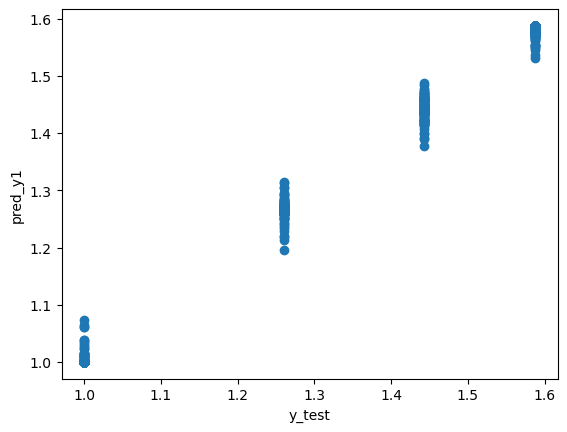

In [168]:
plt.scatter(x=y_test,y=pred_y1)
plt.xlabel('y_test')
plt.ylabel('pred_y1')

Saving best Model

In [169]:
import pickle
filename = 'Zomato Restaurant_AverageCostforTwo_best_model.pkl'
pickle.dump(best_rfc, open(filename, 'wb'))